# Introduction

Le jeu de données Levine_13dim est un jeu à 13 dimensions de cellules analysées par Cytométrie de masse. IL contient 167 044 cellules, toutes décrites par 13 marqueurs (protéïnes). Des labels (au nombre de 24) sont disponibles pour 49% du jeu de données.
En résumé on a donc :
  - n = 167 044
  - p = 14
Les 13 marqueurs protéiniques sont issus d'une analyse par citométrie de moelle d'os de patients attent de leucémie. Les cellules peuvent être classés à la main dans différents métaclusteurs mais la difficulté de prédiction de l'évolution des cellules cancéreuse rend cette classification manuelle initéressante. Ainsi avec la possibilité d'obtenir de grands jeux de données par citométrie nous avons à présent la possibilité de développer des algorithmes de clustering pour traiter ce problème.

L'objectif du travail est de réaliser un clustering sur ce jeu de données. Dans un premier temps réaliser un clustering sur l'ensemble du dataset, potentiellement en passant au préalable par une analyse en composantes principales. Puis caractériser chaque cluster obtenu. Enfin, récommencer ce travail sur chaque cluster afin de tenter d'obtenir des sous clusters plus fin potentiellement basés sur des variables latentes.
Pour commencer nous allons regarder le comportement et l'éfficacité des algorithmes de clustering conventionnels sur ce jeu de données en utilisant la partie labélisée du jeux de données comme référence.

PS : Un second jeu de données à 32 dimensions est également disponible si les perspectives sont trop rapidement limitées. L'objectif à long terme serait d'appliquer les fruits de ce travail sur un jeu à 340 dimensions.

# Exploration des variables

In [7]:
!pip install dexplot
import dexplot as dxp

     |████████████████████████████████| 173 kB 16.3 MB/s 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Levine_13dim.txt", sep="\t")
data.shape

(167044, 14)

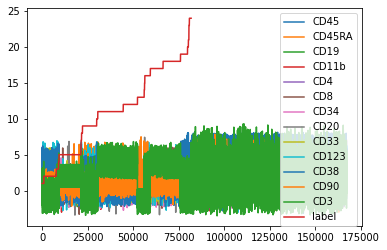

In [8]:
data.plot()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


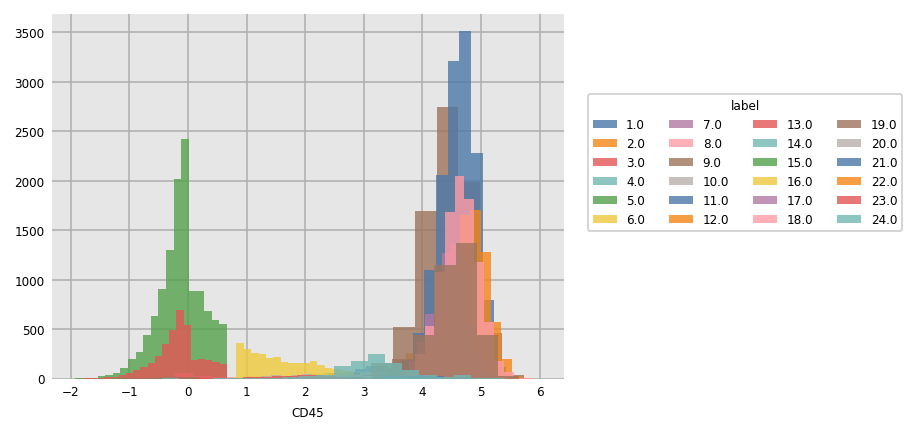

In [10]:
dxp.hist(val='CD45', data=data, split='label')

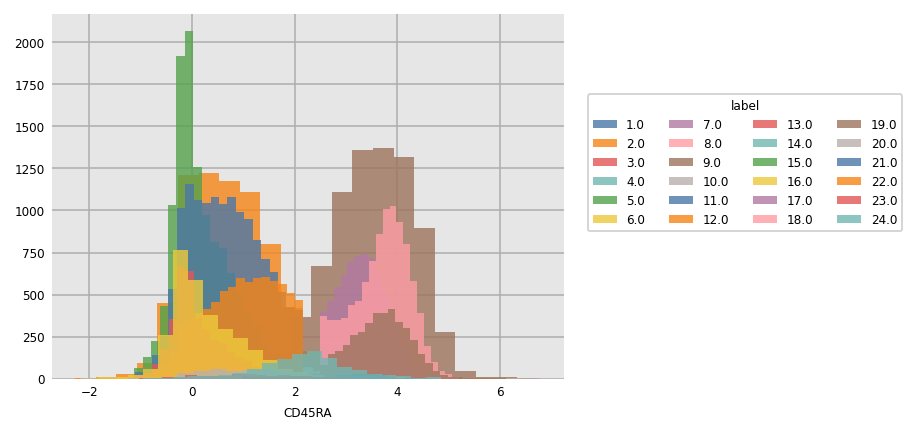

In [11]:
dxp.hist(val='CD45RA', data=data, split='label')

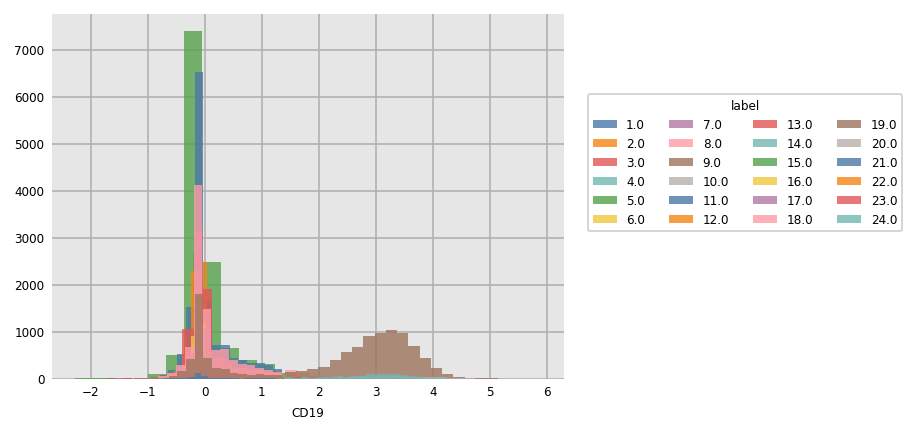

In [12]:
dxp.hist(val='CD19', data=data, split='label')

Les trois histogrammes précédents nouos rassure sur le faut que les parqueurs protéiniques que nous considéront peuvent être utiliséspour disciminer les différentes classes de cellules. 

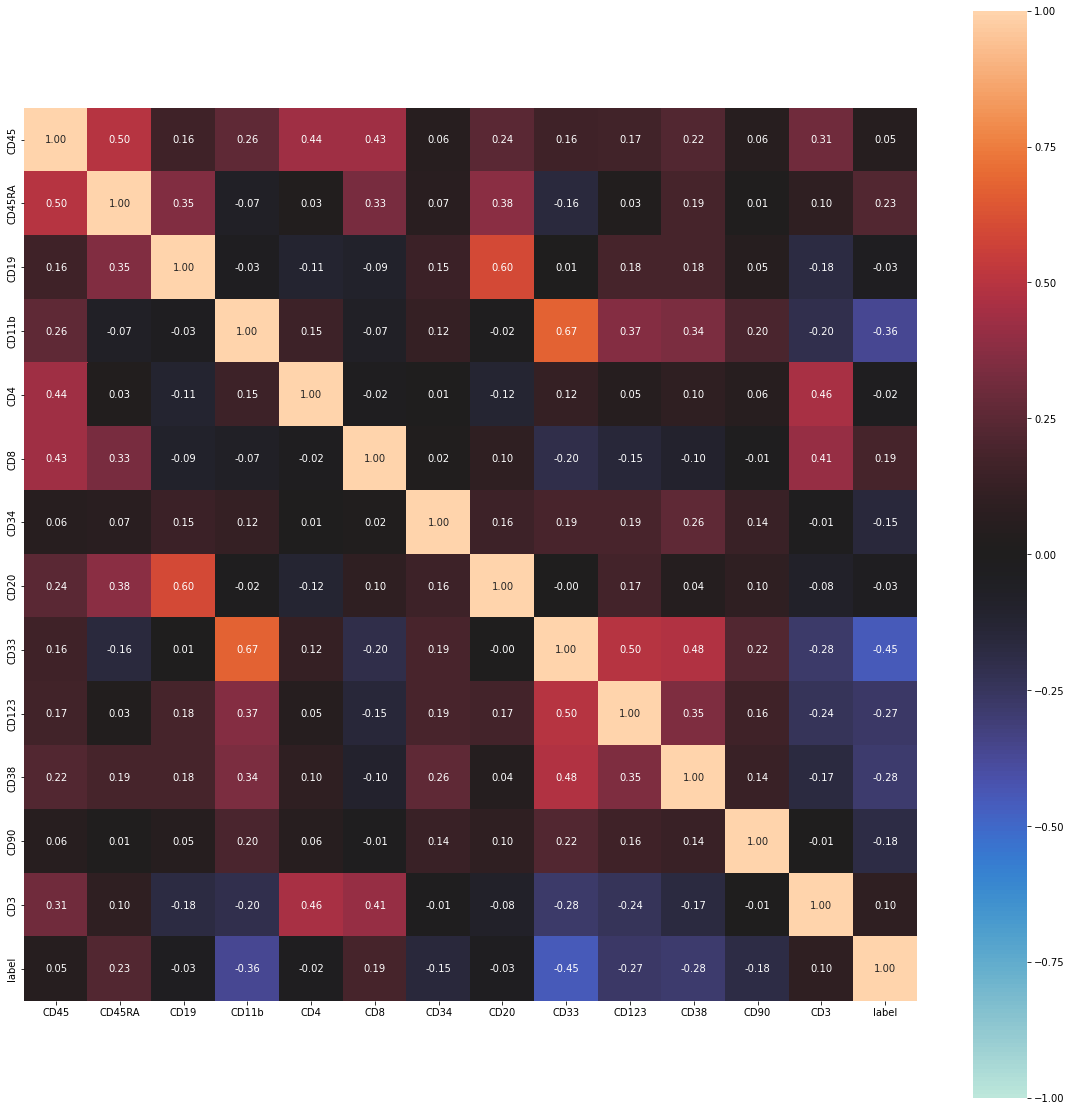

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f11443a3090>,
 'corr':             CD45    CD45RA      CD19  ...      CD90       CD3     label
 CD45    1.000000  0.495775  0.160383  ...  0.058010  0.311360  0.047198
 CD45RA  0.495775  1.000000  0.352000  ...  0.014594  0.097064  0.226454
 CD19    0.160383  0.352000  1.000000  ...  0.052170 -0.176384 -0.031047
 CD11b   0.264393 -0.065972 -0.029800  ...  0.196197 -0.203367 -0.364577
 CD4     0.436660  0.027768 -0.111613  ...  0.056246  0.459062 -0.020098
 CD8     0.433041  0.332893 -0.090292  ... -0.010486  0.406487  0.185896
 CD34    0.058507  0.068569  0.147141  ...  0.139891 -0.013500 -0.149362
 CD20    0.243987  0.379161  0.599485  ...  0.098002 -0.081368 -0.028790
 CD33    0.163376 -0.156603  0.007474  ...  0.219901 -0.281213 -0.447670
 CD123   0.165826  0.029959  0.182914  ...  0.159338 -0.235097 -0.270495
 CD38    0.222912  0.185168  0.180682  ...  0.138043 -0.168622 -0.284494
 CD90    0.058010  0.014594  0.052170  ...  1.0000

In [9]:
!pip install dython
from dython.nominal import associations
associations(data,figsize =(20,20))

Ici, on observe aisément que certaines variéables sont fortement corrélés, ainsi une PCA pourrait être efficace pour pouvoir observer le jeu de données. 

# Clustering

---



Dans cette partie nous allons appliquer des algorithmes de clustering "classiques" sur les données afin d'observer leur comportement et juger de leur possible emploie dans ce contexte.

In [3]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

(167044, 14)
(81747,)


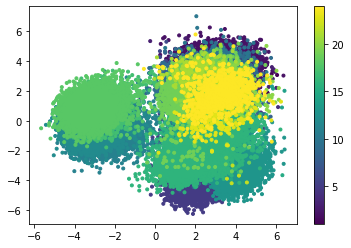

In [5]:
# Load Data

data_reloaded = pd.read_csv("/content/drive/MyDrive/Levine_13dim.txt", sep="\t")
print(data_reloaded.shape)
data_reloaded = data_reloaded.dropna()
labels = data_reloaded['label']
data_pca = data_reloaded.drop(['label'], axis=1)
pca = PCA(2)
#print(type(labels))
# Transform the data
df = pca.fit_transform(data_pca)
#print(df.shape)
plt.figure('PCA et labels')
print(data_reloaded['label'].shape)
plt.scatter(df[:, 0], df[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data_reloaded.get('label'), marker=".")

plt.colorbar()

A titre de référence nous garderons en tête la réprésentation précédente du jeu de données labélisé obtenue après une PCA. On note à cette occasion que la représentation obtenue n'est pas très satisfaisante.

## kmeans

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
# Load Data

data = pd.read_csv("/content/drive/MyDrive/Levine_13dim.txt", sep="\t")
data.head()

,CD45,CD45RA,CD19,CD11b,CD4,CD8,CD34,CD20,CD33,CD123,CD38,CD90,CD3,label
0,3.138041,1.618552,0.525611,-0.104680,0.811363,1.740672,0.531365,-0.153811,4.291140,2.615224,4.646570,1.849447,1.280036,1.0
1,3.486871,2.247755,0.309583,0.833397,1.550594,1.829030,-0.033018,0.290684,4.672004,1.532877,4.253449,0.422374,0.066806,1.0
2,2.145520,0.796811,-0.116073,0.186249,0.529898,0.834876,0.734445,1.590881,4.473149,0.443484,4.511387,0.124615,-2.066902,1.0
3,4.321869,0.167016,-0.639139,-0.020982,1.814245,-0.094315,1.416341,-0.028213,4.295604,2.546383,5.004100,1.326005,-1.015953,1.0
4,2.633997,0.714859,-0.173889,-0.042410,0.450911,1.587902,0.731608,0.139234,4.115300,1.579856,5.065479,0.632904,-0.703904,1.0


In [ ]:

data = data.dropna()
labels = data['label']
data = data.drop(['label'], axis=1)

In [ ]:
# Transform the data
pca_dim = 2
pca = PCA(pca_dim)
df = pca.fit_transform(data)

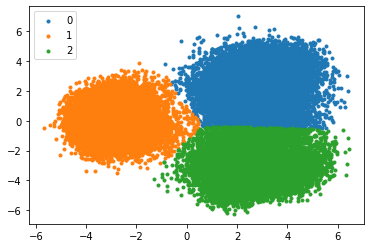

In [ ]:
# Import KMeans module

# Initialize the class object
kmeans = KMeans(n_clusters=3)
#print(df.shape)
# predict the labels of clusters.
label = kmeans.fit_predict(df)
#print(np.reshape(label, (81747,1)).shape)
# Getting unique labels
u_labels = np.unique(label)
plt.figure('PCA et kmeans')
# plotting the results:
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i, marker=".")
plt.legend()

Dans un premier temps, après une PCA nous appliquons ici un kmeans à trois clusters, le résultats ne semble pas abérant donc il semble envisageable de séparer les clmuster en trois jeux de données différents afin de recommencer la démarche sur chaque sous jeu de données.


In [ ]:
# Découpage du dataset en sous dataset en fonction des cluster formés par le kmeans
results = np.hstack((data, np.reshape(label, (81747,1))))
data2 = pd.DataFrame(results, columns=['CD45', 'CD45RA', 'CD19', 'CD11b', 'CD4	', 'CD8	', 'CD34', 'CD20', 'CD33', 'CD123', 'CD38', 'CD90', 'CD3', 'label'])
data0 = data2[data2['label'] == 0]
data1 = data2[data2['label'] == 1]
data2 = data2[data2['label'] == 2]
print('split 1', data0.shape)
print('split 2', data1.shape)
print('split 3', data2.shape)
#########

labels = data0['label']
data0 = data0.drop(['label'], axis=1)

split 1 (24286, 14)
split 2 (38332, 14)
split 3 (19129, 14)


In [ ]:
# Transform the data
pca = PCA(pca_dim)
df0 = pca.fit_transform(data0)
df1 = pca.fit_transform(data1)
df2 = pca.fit_transform(data2)




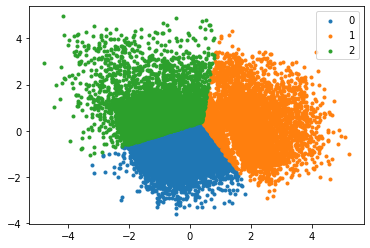

In [ ]:
df = df2
# Initialize the class object
kmeans = KMeans(n_clusters=3)
#print(df.shape)
# predict the labels of clusters.
label = kmeans.fit_predict(df)
#print(np.reshape(label, (81747,1)).shape)
# Getting unique labels
u_labels = np.unique(label)
plt.figure('PCA et kmeans 2')
# plotting the results:
for i in u_labels:
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i, marker=".")
plt.legend()

Nous appliquons de nouveau un kmeans à trois cluster sur un des trois sous datasets obtenus précédement. On remarque ici que la séparation ne semble absolument pas avoir de sens. A priori une configuration de kmeans ne semble pouvoir fonctionner dans cette situation.


## DBSCAN

A présent nous allons essayer d'appliquer DBSCAN à  ce jeu de données. L'avantage de cette algorithme est qu'il est autome quand au choix du nobre de cluster ce qui est très intéressant dans notre cas d'étude. 


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
# Load Data

data = pd.read_csv("/content/Levine_13dim.txt", sep="\t")
data.head()
data = data.dropna()
labels = data['label']
data = data.drop(['label'], axis=1)


In [ ]:
# Transform the data with PCA
pca_dim = 2
pca = PCA(pca_dim)
df = pca.fit_transform(data)

In [ ]:
db = DBSCAN(eps=0.1, min_samples=10).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

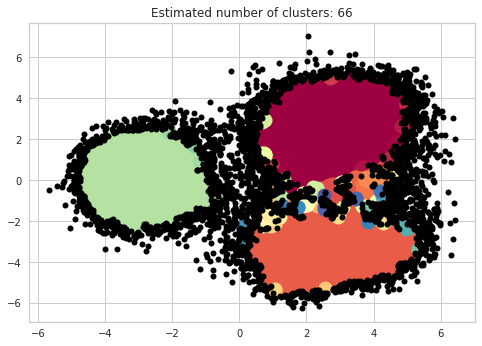

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

DBSCAN est relativement cohérent dans l'ensemble sur son choix de cluster, néanmoins les zones frontalières sont très incertaines. L'utilisation de la PCA avant DBSCAN me semble très discutable puisqu'elle nous fait perdre une partie de la richesse d'information contenue dans les 13 dimensions de départ.


## T-SNE

LE t-SNE est l'algorithme sur lequel je mise beaucoup d'espoir à cause de sa grande capacité à séparer proprement les clusters ce qui serait très intéressant dans notre cas d'étude. 

In [14]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [15]:
# Load Data

data = pd.read_csv("/content/drive/MyDrive/Levine_13dim.txt", sep="\t")
data.head()
data = data.dropna()
labels = data['label']
data = data.drop(['label'], axis=1)

In [16]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_result = tsne.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 81747 samples in 0.213s...
[t-SNE] Computed neighbors for 81747 samples in 44.831s...
[t-SNE] Computed conditional probabilities for sample 1000 / 81747
[t-SNE] Computed conditional probabilities for sample 2000 / 81747
[t-SNE] Computed conditional probabilities for sample 3000 / 81747
[t-SNE] Computed conditional probabilities for sample 4000 / 81747
[t-SNE] Computed conditional probabilities for sample 5000 / 81747
[t-SNE] Computed conditional probabilities for sample 6000 / 81747
[t-SNE] Computed conditional probabilities for sample 7000 / 81747
[t-SNE] Computed conditional probabilities for sample 8000 / 81747
[t-SNE] Computed conditional probabilities for sample 9000 / 81747
[t-SNE] Computed conditional probabilities for sample 10000 / 81747
[t-SNE] Computed conditional probabilities for sample 11000 / 81747
[t-SNE] Computed conditional probabilities for sample 12000 / 81747
[t-SNE] Computed conditional probabilities for sa

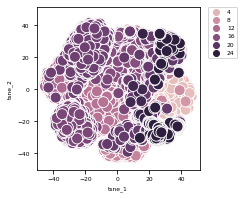

In [17]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:, 0], 'tsne_2': tsne_result[:, 1], 'label': labels})
fig, ax = plt.subplots(1, figsize=(5, 3))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=120)
lim = (tsne_result.min() - 5, tsne_result.max() + 5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

Le t-SNE est effectivemtn capable de séparer et de représenter de façon acceptable le jeu de données. Il est donc très intéressant pour la visualisation des données et sera très utile dans le cas d'étude qui est le notre.

In [ ]:
tsne3 = TSNE(n_components=3, verbose=1, random_state=123)
tsne_result3 = tsne3.fit_transform(data)

In [ ]:
print(tsne_result3.shape)

(31049, 3)


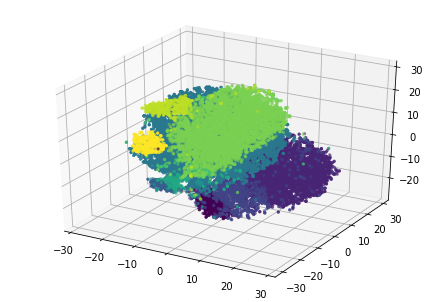

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result3[:, 0], 'tsne_2': tsne_result3[:, 1], 'tsne_3': tsne_result3[:, 2], 'label': labels})
ax.scatter(tsne_result_df['tsne_1'], tsne_result_df['tsne_2'], tsne_result_df['tsne_3'], marker=".",c=tsne_result_df['label'])

plt.show()

Un t-SNE à trois dimension semble également intéresssant même si la visualisation n'est pas optimale dans un notebook. 



## Conclusion


L'algorithme du kmeans semble totalement inutilisable dans notre cas d'application. Le DBSCAN est pas mal mais l'utilisation de la PCA amont nous prive de la richeesse du jeu de donnée pourtant fondamentale ici puisque nouis cherchons de petits clusters de cellules cachés. Enfin le t-SNE est réellement un outil à garder dans le porjet, pas nécessairement pour réaliser le clustering mais bien pour représenter la topologie du jeu de données dans des dimensions visualisables.
En conclusion afin de réaliser un clustering interessant nous nous tournerons vers des algorithmes plus complexes comme le PhenoGraph mais nous concerverons le t-SNE pour la viualisation des données tout au long de l'étude.